In [47]:
import pandas as pd
import numpy as np
import  seaborn as sns
from sklearn.model_selection import  cross_val_score
from sklearn.linear_model import  LinearRegression, Ridge
from sklearn.ensemble import  GradientBoostingRegressor, RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

In [48]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
for col in train_df.columns:
    if(col!="SalePrice"):
        if(train_df[col].dtype=="object"):
            unique_cat = test_df[col].unique()
            train_df = train_df[train_df[col].isin(unique_cat) | train_df[col].isnull()]


In [50]:
for col in train_df.columns:
    if (col != "SalePrice"):
        if (train_df[col].dtype == "object"):
            print(col)
            print(f"train is {train_df[col].nunique()}")
            print(f"test is {test_df[col].nunique()}")
            print()
# still problem in GarageCond

MSZoning
train is 5
test is 5

Street
train is 2
test is 2

Alley
train is 2
test is 2

LotShape
train is 4
test is 4

LandContour
train is 4
test is 4

Utilities
train is 1
test is 1

LotConfig
train is 5
test is 5

LandSlope
train is 3
test is 3

Neighborhood
train is 25
test is 25

Condition1
train is 9
test is 9

Condition2
train is 5
test is 5

BldgType
train is 5
test is 5

HouseStyle
train is 7
test is 7

RoofStyle
train is 6
test is 6

RoofMatl
train is 4
test is 4

Exterior1st
train is 13
test is 13

Exterior2nd
train is 15
test is 15

MasVnrType
train is 3
test is 3

ExterQual
train is 4
test is 4

ExterCond
train is 5
test is 5

Foundation
train is 6
test is 6

BsmtQual
train is 4
test is 4

BsmtCond
train is 4
test is 4

BsmtExposure
train is 4
test is 4

BsmtFinType1
train is 6
test is 6

BsmtFinType2
train is 6
test is 6

Heating
train is 4
test is 4

HeatingQC
train is 5
test is 5

CentralAir
train is 2
test is 2

Electrical
train is 4
test is 4

KitchenQual
train is 4
t

In [51]:
col = "GarageCond"
print(f"train is {train_df[col].unique()}")
print(f"test is {test_df[col].unique()}")

train is ['TA' 'Fa' nan 'Gd' 'Po']
test is ['TA' nan 'Fa' 'Gd' 'Po' 'Ex']


<Axes: xlabel='GarageCond', ylabel='SalePrice'>

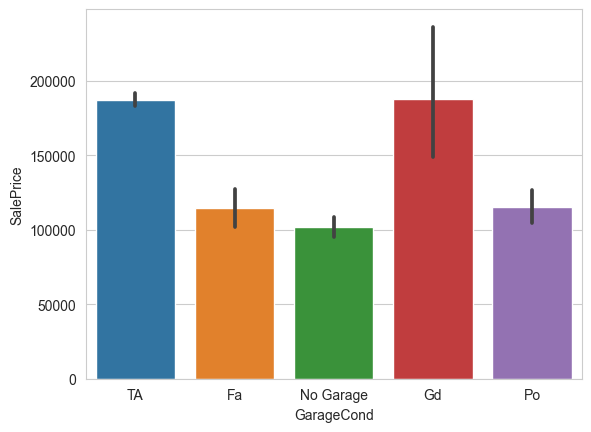

In [52]:
train_df["GarageCond"].fillna("No Garage",inplace=True)
test_df["GarageCond"].fillna("No Garage",inplace=True)

test_df["GarageCond"] = test_df["GarageCond"].apply(lambda x: "Gd" if x=="Ex" else x);
sns.barplot(x="GarageCond",y="SalePrice",data=train_df)

In [53]:
mapping = {
    20:"a",
    30:"b",
    40:"c",
    45:"d",
    50:"e",
    60:"f",
    70:"g",
    75:"h",
    80:"i",
    85:"j",
    90:"k",
    120:"l",
    150:"m",
    160:"n",
    180:"o",
    190:"p",

}

train_df["MSSubClass"]= train_df["MSSubClass"].map(mapping)
test_df["MSSubClass"]= test_df["MSSubClass"].map(mapping)
test_df["MSSubClass"] = test_df["MSSubClass"].apply(lambda x: "n" if x=="m" else x)

In [54]:
print(f"train is {train_df[col].unique()}")
print(f"test is {test_df[col].unique()}")

train is ['TA' 'Fa' 'No Garage' 'Gd' 'Po']
test is ['TA' 'No Garage' 'Fa' 'Gd' 'Po']


In [55]:
null_cols = []

for col in train_df.columns:
    if train_df[col].isna().sum() > 0:
        null_cols.append({col: train_df[col].isna().sum()})

null_cols

[{'LotFrontage': 253},
 {'Alley': 1343},
 {'MasVnrType': 850},
 {'MasVnrArea': 8},
 {'BsmtQual': 36},
 {'BsmtCond': 36},
 {'BsmtExposure': 37},
 {'BsmtFinType1': 36},
 {'BsmtFinType2': 37},
 {'Electrical': 1},
 {'FireplaceQu': 679},
 {'GarageType': 78},
 {'GarageYrBlt': 78},
 {'GarageFinish': 78},
 {'GarageQual': 78},
 {'PoolQC': 1427},
 {'Fence': 1156},
 {'MiscFeature': 1380}]

In [56]:
fill_by_mean = ["LotFrontage","MasVnrArea","GarageYrBlt"]
fill_by_not_present = ["Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","FireplaceQu","GarageType","GarageFinish","GarageQual","PoolQC","Fence","MiscFeature","BsmtFinType2"]

In [57]:
train_df.drop(columns=["Electrical"],inplace=True)
test_df.drop(columns=["Electrical"],inplace=True)

In [58]:
train_df[fill_by_not_present] = train_df[fill_by_not_present].fillna("Not Present")
test_df[fill_by_not_present] = test_df[fill_by_not_present].fillna("Not Present")

In [59]:
train_df[fill_by_mean] = train_df[fill_by_mean].fillna(train_df[fill_by_mean].mean())
test_df[fill_by_mean] = test_df[fill_by_mean].fillna(test_df[fill_by_mean].mean())

In [60]:
for col in test_df.columns:
    if test_df[col].isna().sum() > 0:
        if(test_df[col].dtype=="object"):
            print(col)
            test_df[col] = test_df[col].fillna(test_df[col].mode().iloc[0])
        else:
            test_df[col] = test_df[col].fillna(test_df[col].mean())

MSZoning
Utilities
Exterior1st
Exterior2nd
KitchenQual
Functional
SaleType


In [61]:
categorical_cols = []

# Iterate over the columns of the train_df DataFrame
for col in train_df.columns:
    if train_df[col].dtype == "object":
        categorical_cols.append(col)

test_df = pd.get_dummies(test_df, columns=categorical_cols)
train_df = pd.get_dummies(train_df, columns=categorical_cols)


In [62]:
def evaluate_model(model,X,y):
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, np.log(y), scoring='neg_mean_squared_error', cv=5)
    mse_scores = -scores

    print(f"The RMSE score for {model_name} is {mse_scores.mean()}")


In [63]:
X = train_df.drop(columns=["SalePrice","Id"])
y = train_df.SalePrice


In [64]:
models = [Ridge(),RandomForestRegressor(),lgb.LGBMRegressor(),xgb.XGBRegressor(),GradientBoostingRegressor()]

In [65]:
for model in models:
    evaluate_model(model,X,y)
    print()

The RMSE score for Ridge is 0.017229380592661873

The RMSE score for RandomForestRegressor is 0.019994029586232316

The RMSE score for LGBMRegressor is 0.017316217636659494

The RMSE score for XGBRegressor is 0.019532155939754946

The RMSE score for GradientBoostingRegressor is 0.016206725447631833



In [66]:
model  = lgb.LGBMRegressor(reg_lambda=10)
evaluate_model(model,X,y)

The RMSE score for LGBMRegressor is 0.016999157063831778


In [67]:
model  = GradientBoostingRegressor()
evaluate_model(model,X,y)

The RMSE score for GradientBoostingRegressor is 0.016341023972483052


In [68]:
best_model = GradientBoostingRegressor()
best_model.fit(X,y)


GradientBoostingRegressor()

In [69]:
X = test_df.drop(columns=["Id"])

predictions = best_model.predict(X)

predictions = pd.DataFrame({'Id':test_df.Id,'SalePrice':predictions})
predictions.head()


,Id,SalePrice
0,1461,122663.465572
1,1462,160839.241143
2,1463,181242.455891
3,1464,179969.438337
4,1465,193674.876007


In [70]:
predictions.to_csv("submission.csv",index=False)